In [190]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
from numpy import *
import math
import pandas

In [191]:
# data1=pd.read_csv("gg.csv") #and print the dataset given
# data1.isnull().sum()
# data1=data1.fillna(value = data1['radius_mean' ].mean())
# data1=data1.fillna(value = data1['perimeter_mean' ].mean())
# data1=data1.fillna(value = data1['concavity_mean' ].mean())
# data1=data1.fillna(value = data1['compactness_se' ].mean())
# data1=data1.fillna(value = data1['area_worst' ].mean())
# data1=data1.fillna(value = data1['concavity_worst' ].mean())
# data1.columns=["ID","Class","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30"]
# data1.pop("ID")
# df = data1['Class']
# data1.pop("Class")
# data1=(data1-data1.mean())/data1.std()
# data1.insert(30, 'Class',df, True)
# # print(data1.isnull().sum())
# # print(data1)
# #(data1)
data1=pd.read_csv("gg.csv") #and print the dataset given
# print(data1)
# data1 = data1.dropna()
# print(data1)
data1.isnull().sum()
data1=data1.fillna(value = data1['radius_mean' ].mean())
data1=data1.fillna(value = data1['perimeter_mean' ].mean())
data1=data1.fillna(value = data1['concavity_mean' ].mean())
data1=data1.fillna(value = data1['compactness_se' ].mean())
data1=data1.fillna(value = data1['area_worst' ].mean())
data1=data1.fillna(value = data1['concavity_worst' ].mean())
data1.columns=["ID","Class","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30"]
data1.pop("ID")
df = data1['Class']
data1.pop("Class")
data1=(data1-data1.mean())/data1.std()
data1.insert(30, 'Class',df, True)
# print(data1.isnull().sum())
# print(data1)
#(data1)

In [192]:
num = float(input())

0.7


In [193]:
X = data1.iloc[:, 0:30].values 
Y = data1.iloc[:, 30].values
#print(X)
#print(Y)

In [194]:
def sigmoid_fn(X):
    return 1./(1 + np.exp(-X))

def predict_fn(X, f , threshold = num):
    z = sigmoid_fn(np.dot(X,f.T))
    return z>=threshold

def loss_fn(Y, f):
    m=Y.shape[0]
    if m == 0:
        print("gg")
    return (-1/m)*((Y.T @ np.log(f,where=f>0)) + ((1 - Y).T @ np.log(1 - f,where=(1-f)>0)))

In [195]:
def accuracy(Y, Y_predict):
  n = len(Y)
  count = 0
  for i in range(0,n):
    if(Y_predict[i] == Y[i]):
      count += 1
  ans = (count * 100)/n
  return ans

In [196]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations = 1000):
   
    m = len(y)
    costs=np.array([])  #initialising prev cost to 0
    #thetas = np.zeros((iterations,4))
    thetas=[]
    accuracies = []
    for it in range(iterations): 
        a = x_train@theta.T  
        b = sigmoid_fn(a)
        c = loss_fn(y_train, b)
        
        
        theta = theta - (learning_rate/m)*np.array((b-y_train).T@x)  #Updating theta value after every iteration using delw
        thetas.append(theta)      
        #costs[it]  = find_cost(theta,x,y) #Updating previous cost
        
        acc = accuracy(y, predict_fn(x,theta))
        accuracies.append(acc)
        cost=np.squeeze(c)
        costs=np.append(costs,cost)
        #print(c)
        #(costs)
    return theta, costs, thetas, accuracies

In [197]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [198]:
def mgradient_descent(x,y,theta,learning_rate=0.01,iterations = 1000,batch_size=32):
   
    m = len(y)
    costs=np.array([])  #initialising prev cost to 0
    #thetas = np.zeros((iterations,4))
    thetas=[]
    accuracies = []
    for it in range(iterations): 
        mini_batches = create_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            a = X_mini@theta.T  
            b = sigmoid_fn(a)
            c = loss_fn(y_mini, b)
            theta = theta - (learning_rate/m)*np.array((b-y_mini).T@X_mini)
          #Updating theta value after every iteration using delw
        thetas.append(theta)      
        #costs[it]  = find_cost(theta,x,y) #Updating previous cost 
        acc = accuracy(y, predict_fn(x,theta))
        accuracies.append(acc)
        cost=np.squeeze(c)
        costs=np.append(costs,cost)
        #print(c)
        #(costs)
    return theta, costs, thetas, accuracies

In [199]:
#Function to solve regression using stochastic gradient descent method
def stochastic_gradient_descent(x,y,theta,learning_rate=0.1,iterations=1000):

    m = len(y)
    costs = np.array([])
    accuracies = []
    for i in range(iterations):
        cost =0.0
        #for i in range(100):
        rand_ind = np.random.randint(0,m)
        X_i = x[rand_ind].reshape(1,x.shape[1])
        y_i = y[rand_ind].reshape(1,1)

        a = X_i@(theta.T)
        b = sigmoid_fn(a)
        c = loss_fn(y_i, b)
        theta = theta -(1/m)*learning_rate*((b - y_i).T@X_i)

        acc = accuracy(y, predict_fn(x,theta))
        accuracies.append(acc)

        cost=np.squeeze(c)
        costs=np.append(costs,cost)
    costs[i]  = cost/m 
    return theta, costs, accuracies

dataset = np.array(data1)


GRADIENT DESCENT

Iteration no. 0
Error Value: 0.41206457737002644
Iteration no. 50
Error Value: 0.16648690933331686
Iteration no. 100
Error Value: 0.09984724135645665
Iteration no. 150
Error Value: 0.08208545480932926

Weights obtained from GD:
 [[ 0.42828712  0.43003714  0.99431133  0.56338378 -0.12465735 -0.07965941
  -0.16811721  0.51172055  0.24950194  0.1688346   0.80649007  0.22638799
   0.61423243  1.08763753  0.02859701 -0.02371983  0.01176744  0.25118053
  -0.09051514 -0.30709961  0.74142414  0.67304381  0.76021403  0.90694945
   0.18731495  0.02833207  0.24641541  0.94248267  0.86071395  0.4034365 ]]

STOCHASTIC GRADIENT DESCENT

Iteration no. 0
Error Value: 0.004752201739691254
Iteration no. 50
Error Value: 0.00013254753347307111
Iteration no. 100
Error Value: 2.7974883610358852e-05
Iteration no. 150
Error Value: 0.003615275121917942

Weights obtained from SGD:
 [[0.18483492 0.2139464  0.78811439 0.31101599 0.13766794 0.36696097
  0.01322722 0.52003643 0.8087357  0.8232877

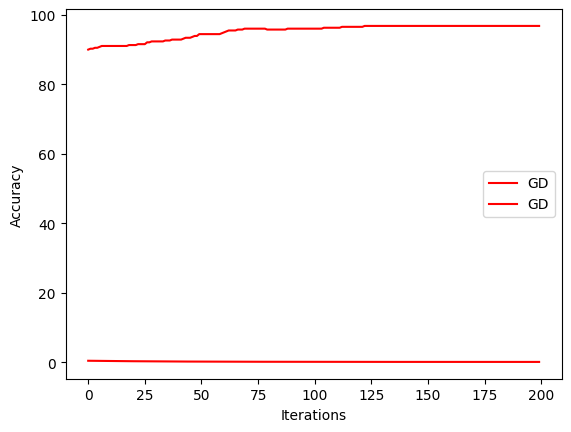

In [200]:
for i in range(10):
    
    np.random.shuffle(dataset) #shuffling to avoid bias
    size_train=int(dataset.shape[0]*0.67)  #Training data size 70% of total
    size_test=int(dataset.shape[0]-size_train) #Testing data size 30% of total
    x_train,x_test,y_train,y_test=dataset[:size_train,0:30],dataset[size_test:,0:30],dataset[:size_train,30:31],dataset[size_test:,30:31]   
   
#splitting into 70-30

    inttheta=np.random.rand(1,30)  #initialising theta to random values to pass
    n_iter=200
    lr=0.1              
    gdtheta, costs_gd, thetas, accuracies_gd = gradient_descent(x_train,y_train,inttheta,lr,n_iter)   #finding weights through GD     
    sgdtheta,costs_sgd, accuracies_sgd = stochastic_gradient_descent(x_train,y_train,inttheta,lr,n_iter) #finding weights through sgd
    mgdtheta,costs_mgd,mthetas,accuracies_mgd = mgradient_descent(x_train,y_train,inttheta,lr,n_iter,32)
#if (i==0):
    if (i==0):
        i, ind=0,0
        print("\nGRADIENT DESCENT\n")
        while (ind<len(costs_gd)):
                   print("Iteration no.", i)
                   print("Error Value:", costs_gd[ind])
                   i+=50
                   ind+=50
        print('\nWeights obtained from GD:\n',gdtheta)
        print("\nSTOCHASTIC GRADIENT DESCENT\n")
        i, ind=0,0
        while (ind<len(costs_sgd)):
                   print("Iteration no.", i)
                   print("Error Value:", costs_sgd[ind])
                   i+=50
                   ind+=50
        print('\nWeights obtained from SGD:\n',sgdtheta)
        print("\MINI GRADIENT DESCENT\n")
        i, ind=0,0
        while (ind<len(costs_mgd)):
                   print("Iteration no.", i)
                   print("Error Value:", costs_mgd[ind])
                   i+=50
                   ind+=50
        print('\nWeights obtained from MGD:\n',mgdtheta)
        
        plt.plot(costs_gd, 'r', label='GD')
#         plt.plot(costs_sgd, 'b', label='SGD')
        plt.ylabel('Error')
        plt.xlabel('Iterations')
        plt.legend()
#         plt.show()


        plt.plot(accuracies_gd, 'r', label='GD')
#         plt.plot(accuracies_sgd, 'b', label='SGD')
        plt.ylabel('Accuracy')
        plt.xlabel('Iterations')
        plt.legend()
#         plt.show()


COMPARING GD FOR DIFFERENT LR VALUES - see plot


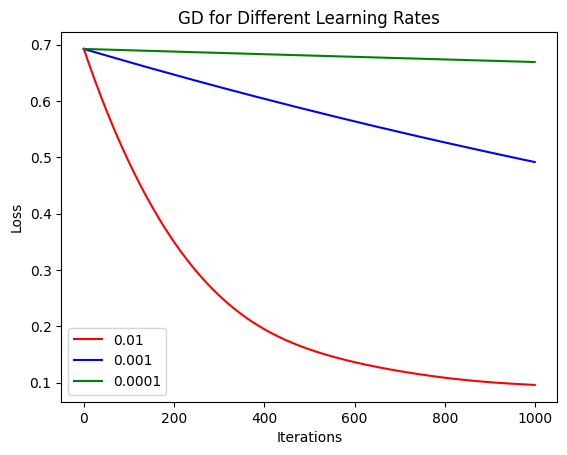

In [201]:
#Comparing GD and SGD for different values of learning rate
# print("\nCOMPARING GD FOR DIFFERENT LR VALUES - see plot")
# n_iter=1000
# iter_sgd=1000
# lr1=0.05
# lr2=0.01
# lr3=0.1
# theta_gd,costs,thetas,accuracies_gd = gradient_descent(x_train,y_train,inttheta,lr1,n_iter)
# plt.plot(accuracies_gd,'r',label='GD')
# plt.ylabel('Accuracy')
# plt.xlabel('Iterations')
# plt.title('GD for Learning Rate 0.05')
# plt.legend()
# plt.show() 
# theta_gd,costs,thetas,accuracies_gd = gradient_descent(x_train,y_train,inttheta,lr2,n_iter)
# plt.plot(accuracies_gd,'r',label='GD')
# plt.ylabel('Accuracy')
# plt.xlabel('Iterations')
# plt.title('GD for Learning Rate 0.01')
# plt.legend()
# plt.show() 
# theta_gd,costs,thetas,accuracies_gd = gradient_descent(x_train,y_train,inttheta,lr3,n_iter)
# plt.plot(accuracies_gd,'r',label='GD')
# plt.ylabel('Accuracy')
# plt.xlabel('Iterations')
# plt.title('GD for Learning Rate 0.1')
# plt.legend()
# plt.show() 
#Comparing GD and SGD for different values of learning rate
plt.close()
print("\nCOMPARING GD FOR DIFFERENT LR VALUES - see plot")
lr = [0.01, 0.001, 0.0001]
color=['r', 'b', 'g']
k=0
n_iter=1000
iter_sgd=1000
for i in lr:
        theta_gd,costs,thetas,accuracies_gd = gradient_descent(x_train,y_train,inttheta,i,n_iter)
        plt.plot(costs, color[k], label=i)
        k+=1
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('GD for Different Learning Rates')
plt.legend()
# plt.show()
plt.savefig('GD'+ str(num*10) + '.png')

# #Comparing GD and SGD for different values of learning rate
# print("\nCOMPARING GD FOR DIFFERENT LR VALUES - see plot")
# lr1 = [0.1, 0.01, 0.05]
# color=['r', 'b', 'g']

# k=0
# n_iter=10000
# iter_sgd=50000

# for i in lr1:
#         theta_gd,costs,thetas,accuracies_gd = gradient_descent(x_train,y_train,inttheta,i,n_iter)
#         plt.plot(accuracies_gd, color[k], label=i)
#         k+=1
# plt.ylabel('Accuracy')
# plt.xlabel('Iterations')
# plt.title('GD for Different Learning Rates')
# plt.legend()
# plt.show()


In [202]:
def f_score(X, Y):
    f_score = (2 * X * Y) / (X + Y)
    return f_score

y_test = np.array(y_test)
Y_predict = predict_fn(x_test, theta_gd)

true_p, true_n, false_p, false_n = [0,0,0,0]

F-score:  0.8531468531468532
Accuracy(%):  88.97637795275591
Recall 0.8591549295774648
precision 0.8472222222222222

COMPARING SGD FOR DIFFERENT LR VALUES - see plot


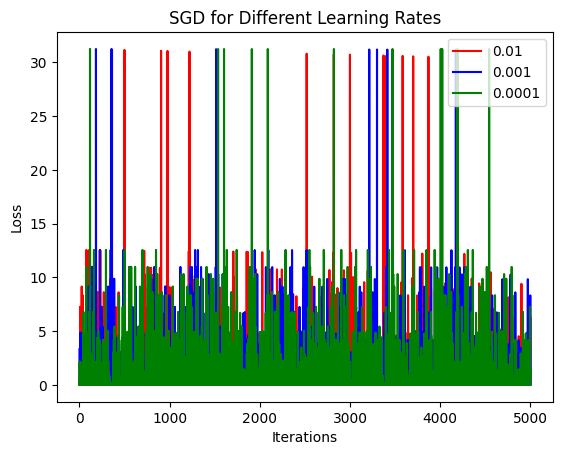

In [203]:
for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(y_test, Y_predict))
print('Recall', recall)
print('precision', precision)
                       
plt.close()
print("\nCOMPARING SGD FOR DIFFERENT LR VALUES - see plot")
k=0
for i in lr:
        theta_gd,costs,accuracies_sgd = stochastic_gradient_descent(x_train,y_train,inttheta,i,5000)
        plt.plot(costs, color[k], label=i)
        k+=1
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('SGD for Different Learning Rates')
plt.legend()
# plt.show()
plt.savefig('SGD'+ str(num*10) + '.png')

In [204]:
# print("\nCOMPARING SGD FOR DIFFERENT LR VALUES - see plot")
# k=0
# for i in lr:
#         theta_gd,costs,accuracies_sgd = stochastic_gradient_descent(x_train,y_train,inttheta,i,iter_sgd)
#         plt.plot(accuracies_sgd, color[k], label=i)
#         k+=1
# plt.ylabel('Accuracy')
# plt.xlabel('Iterations')
# plt.title('SGD for Different Learning Rates')
# plt.legend()
# plt.show()
# plt.savefig('SGD'+ str(num*10) + '.png')

In [205]:
def accuracy(Y, Y_predict):
  n = len(Y)
  count = 0
  for i in range(0,n):
    if(Y_predict[i] == Y[i]):
      count += 1
  ans = (count * 100)/n
  return ans

def f_score(X, Y):
    f_score = (2 * X * Y) / (X + Y)
    return f_score

y_test = np.array(y_test)
Y_predict = predict_fn(x_test, theta_gd)

true_p, true_n, false_p, false_n = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(y_test, Y_predict))
print('Recall', recall)
print('precision', precision)


F-score:  0.8442906574394463
Accuracy(%):  88.18897637795276
Recall 0.8591549295774648
precision 0.8299319727891157



COMPARING MINI BATCH FOR DIFFERENT LR VALUES - see plot


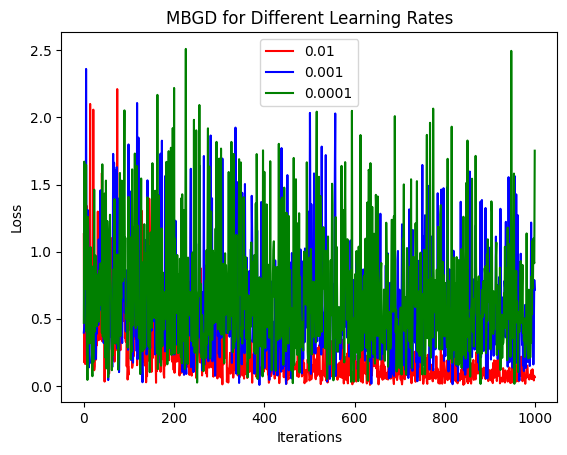

F-score:  0.8531468531468532
Accuracy(%):  88.97637795275591
Recall 0.8591549295774648
precision 0.8472222222222222


<Figure size 640x480 with 0 Axes>

In [206]:
plt.close()
print("\nCOMPARING MINI BATCH FOR DIFFERENT LR VALUES - see plot")
k=0
for i in lr:
        theta_gd,costs,thetas,accuracies_gd = mgradient_descent(x_train,y_train,inttheta,i,1000)
        plt.plot(costs, color[k], label=i)
        k+=1
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('MBGD for Different Learning Rates')
plt.legend()
plt.show()
plt.savefig('MBGD'+ str(num*10) + '.png')

def accuracy(Y, Y_predict):
  n = len(Y)
  count = 0
  for i in range(0,n):
    if(Y_predict[i] == Y[i]):
      count += 1
  ans = (count * 100)/n
  return ans

def f_score(X, Y):
    f_score = (2 * X * Y) / (X + Y)
    return f_score

y_test = np.array(y_test)
Y_predict = predict_fn(x_test, theta_gd)

true_p, true_n, false_p, false_n = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (Y_predict[i] == 1):
            true_p += 1
        else:
            false_n += 1
    else:
        if(Y_predict[i] == 0):
            true_n += 1
        else:
            false_p += 1

(true_p, false_p, true_n, false_n)

precision = true_p / (true_p + false_p)
recall = true_p / (true_p + false_n)

print('F-score: ', f_score(precision, recall))
print('Accuracy(%): ', accuracy(y_test, Y_predict))
print('Recall', recall)
print('precision', precision)